# Fake News Project

1. Initial EDA
2. Binary labels

    a. Disregarding domain
        i. Sentiment analysis
        ii. Prediction
    b. Sampling with domain in consideration
        i. Sentiment analysis
        ii. Prediction       
3. Multi-class labels

In [80]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk


from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords 
from nltk.corpus import sentiwordnet as swn

from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import LinearSVC

from xgboost import XGBClassifier


## Initial EDA

In [2]:
df = pd.read_csv('newly_sampled_data.csv')

In [3]:
df.shape

(10000, 16)

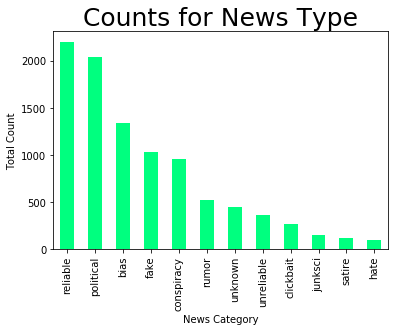

In [4]:
df.type.value_counts().plot(kind='bar', color='springgreen')
plt.xlabel('News Category')
plt.ylabel('Total Count')
plt.title("Counts for News Type", fontsize=25)
plt.savefig('newstypecounts.png', bbox_inches='tight')

Text(0.5, 1.0, 'Counts for Domain')

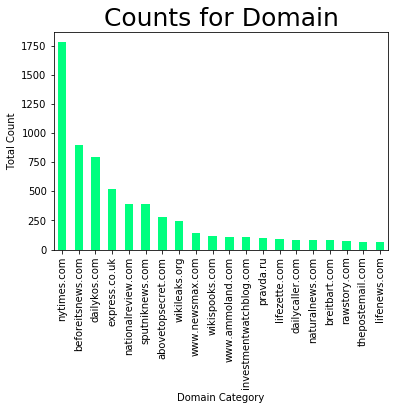

In [5]:
df.domain.value_counts().nlargest(20).plot(kind='bar', color='springgreen')
plt.xlabel('Domain Category')
plt.ylabel('Total Count')
plt.title("Counts for Domain", fontsize=25)

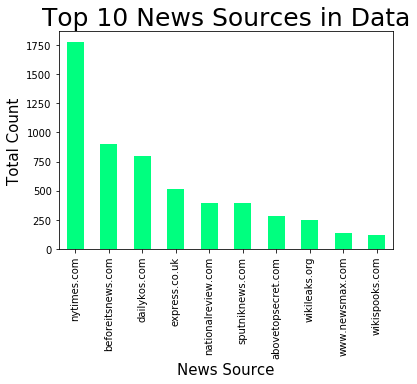

In [6]:
valcounts_domain = df.domain.value_counts()
topten_domain = valcounts_domain.head(10)
topten_domain.plot(kind='bar', color='springgreen')
plt.xlabel('News Source', fontsize=15)
plt.ylabel('Total Count', fontsize=15)
plt.title("Top 10 News Sources in Data", fontsize=25)
plt.savefig('top10newssources.png', bbox_inches='tight')

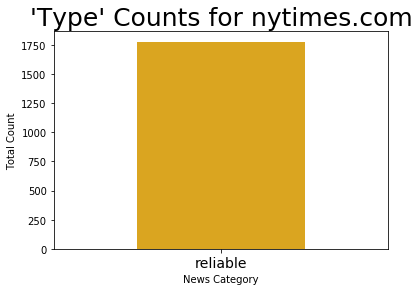

In [7]:
nytimes = df.loc[df['domain'] =='nytimes.com'] 
nytimes.type.value_counts().plot(kind='bar', color='goldenrod')
plt.xlabel('News Category')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=0)
plt.title("'Type' Counts for nytimes.com", fontsize=25)
plt.savefig('nytimes.png', bbox_inches='tight')

The dataset defines every document from The New York Times as being 'reliable'.

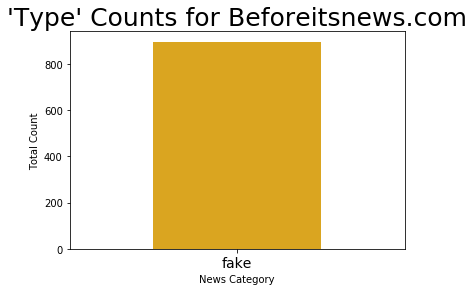

In [8]:
beforeitsnews = df.loc[df['domain'] =='beforeitsnews.com'] 
beforeitsnews.type.value_counts().plot(kind='bar', color='goldenrod')
plt.xlabel('News Category')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=0)
plt.title("'Type' Counts for Beforeitsnews.com", fontsize=25)
plt.savefig('beforeitsnews.png', bbox_inches='tight')

Similarly, every single article from beforeitsnews.com is considered to be 'fake' in the dataset. 

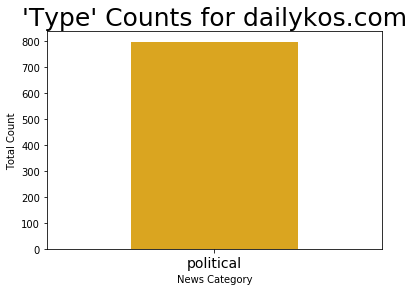

In [9]:
dailykos = df.loc[df['domain'] =='dailykos.com'] 
dailykos.type.value_counts().plot(kind='bar', color='goldenrod')
plt.xlabel('News Category')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=0)
plt.title("'Type' Counts for dailykos.com", fontsize=25)
plt.savefig('dailykos.png', bbox_inches='tight')

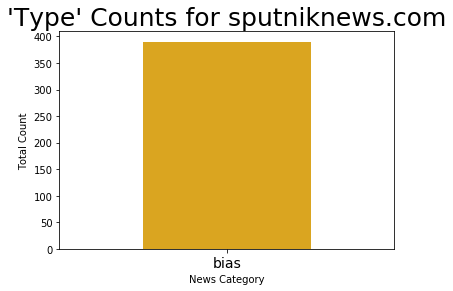

In [10]:
sputnik = df.loc[df['domain'] =='sputniknews.com'] 
sputnik.type.value_counts().plot(kind='bar', color='goldenrod')
plt.xlabel('News Category')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=0)
plt.title("'Type' Counts for sputniknews.com", fontsize=25)
plt.savefig('sputnik.png', bbox_inches='tight')

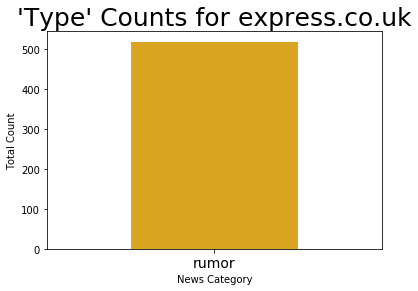

In [11]:
express = df.loc[df['domain'] =='express.co.uk'] 
express.type.value_counts().plot(kind='bar', color='goldenrod')
plt.xlabel('News Category')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=0)
plt.title("'Type' Counts for express.co.uk", fontsize=25)
plt.savefig('express.co.uk.png', bbox_inches='tight')

It should be noted that there is inherent bias in this dataset from the labelling of every single article from a given source as being 'rumor', 'junksci', 'bias', or 'political', as opposed to 'reliable', as any given source will contain a wide variety of documents, with varying levels of veracity.

## Binary Classification

## 'Fake' vs. 'Reliable' news in dataset

In [12]:
df = pd.read_csv('complete_new_data.csv')

In [13]:
df.shape

(20000, 16)

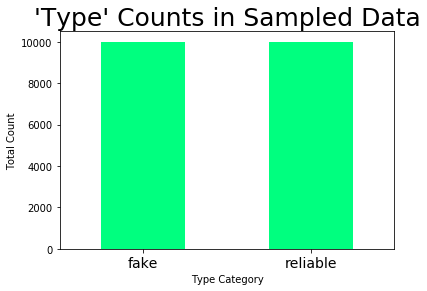

In [14]:
df.type.value_counts().plot(kind='bar', color='springgreen')
plt.xlabel('Type Category')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=0)
plt.title("'Type' Counts in Sampled Data", fontsize=25)
plt.savefig('typecounts.png', bbox_inches='tight')

10,000 articles labeled 'fake' and '10,000' articles labelled 'reliable' have been sampled from the larger dataset. 

In [15]:
df.drop(['tags', 'summary', 'source'], axis=1)

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mother...,"(Before It's News)\n\nOkay, so I have had one ...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politic...,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",NaN,NaN,[''],NaN
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/0...,Headline: Bitcoin & Blockchain Searches Exceed...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80...,NaN,NaN,[''],NaN
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-fo...,Go for it\n\n(Before It's News)\n\nThe morning...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Go for it,Greater Fool,NaN,[''],NaN
4,4669035,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2011/02/irish...,Irish bank flight quickens despite EU rescue\n...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Irish bank flight quickens despite EU rescue,Josey Wales,NaN,[''],NaN
5,6916755,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2011/0...,Chinese Drywall Complaint Center Urges Florida...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Chinese Drywall Complaint Center Urges Florida...,Pr Web,NaN,[''],NaN
6,6117241,beforeitsnews.com,fake,http://beforeitsnews.com/alternative/2017/04/m...,Maine pushes to make it harder for voter initi...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Maine pushes to make it harder for voter initi...,NaN,NaN,[''],NaN
7,5146269,beforeitsnews.com,fake,http://beforeitsnews.com/vietnamese/2014/03/6-...,% of readers think this story is Fact. Add you...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,6 thông tin kinh tế nổi bật tuần từ 09/03 - 14/03,NaN,NaN,[''],NaN
8,6711496,beforeitsnews.com,fake,http://beforeitsnews.com/media/2014/11/high-re...,High-resolution geological map of asteroid Ves...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,High-resolution geological map of asteroid Ves...,The Watchers,NaN,[''],NaN
9,4215522,thenet24h.com,fake,http://thenet24h.com/20655542/story-appalachia...,The New York Times Books reviews RAMP HOLLOW b...,2017-11-27T01:15:32.269834,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"The Story of Appalachia, With Plenty of Villai...",NaN,NaN,[''],The New York Times Books reviews RAMP HOLLOW b...


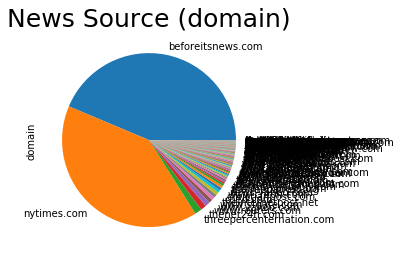

In [16]:
df.domain.value_counts().plot(kind='pie')
plt.title("News Source (domain)", fontsize=25)
plt.savefig('newssourcepie.png', bbox_inches='tight')

## Sentiment Analysis with VADER and textblob

In [17]:
fake = df[df['type']=='fake']

In [18]:
fake.shape

(10000, 16)

In [19]:
fakecontent = []
for index, row in fake.iterrows():
    print (index)
    fakecontent.append(row['content'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670


5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234


7641
7642
7643
7644
7645
7646
7647
7648
7649
7650
7651
7652
7653
7654
7655
7656
7657
7658
7659
7660
7661
7662
7663
7664
7665
7666
7667
7668
7669
7670
7671
7672
7673
7674
7675
7676
7677
7678
7679
7680
7681
7682
7683
7684
7685
7686
7687
7688
7689
7690
7691
7692
7693
7694
7695
7696
7697
7698
7699
7700
7701
7702
7703
7704
7705
7706
7707
7708
7709
7710
7711
7712
7713
7714
7715
7716
7717
7718
7719
7720
7721
7722
7723
7724
7725
7726
7727
7728
7729
7730
7731
7732
7733
7734
7735
7736
7737
7738
7739
7740
7741
7742
7743
7744
7745
7746
7747
7748
7749
7750
7751
7752
7753
7754
7755
7756
7757
7758
7759
7760
7761
7762
7763
7764
7765
7766
7767
7768
7769
7770
7771
7772
7773
7774
7775
7776
7777
7778
7779
7780
7781
7782
7783
7784
7785
7786
7787
7788
7789
7790
7791
7792
7793
7794
7795
7796
7797
7798
7799
7800
7801
7802
7803
7804
7805
7806
7807
7808
7809
7810
7811
7812
7813
7814
7815
7816
7817
7818
7819
7820
7821
7822
7823
7824
7825
7826
7827
7828
7829
7830
7831
7832
7833
7834
7835
7836
7837
7838
7839
7840


In [20]:
print (len(fakecontent))

10000


In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for doc in fakecontent:
    pol_score = sia.polarity_scores(doc)
    pol_score['content'] = doc
    results.append(pol_score)

In [22]:
fakedf = pd.DataFrame.from_records(results)

In [23]:
fakedf['label'] = 0
fakedf.loc[fakedf['compound'] > 0.2, 'label'] = 1
fakedf.loc[fakedf['compound'] < -0.2, 'label'] = -1

In [24]:
fakedf.label.value_counts()

 1    5939
-1    3464
 0     597
Name: label, dtype: int64

In [25]:
print (fakedf['compound'].mean())

0.22222996999999992


In [26]:
print (fakedf['neg'].mean())

0.07293319999999968


In [27]:
print (fakedf['neu'].mean())

0.8347048000000006


In [28]:
print (fakedf['pos'].mean())

0.09234690000000038


In [29]:
def textblob_polarity_score(text):
    blob = TextBlob(text)
    return blob.sentiment[0]

In [30]:
fakedf["textblob_polarity_score"] = fakedf["content"].apply(textblob_polarity_score)

In [31]:
def textblob_subjectivity_score(text):
    blob = TextBlob(text)
    return blob.sentiment[1]

In [32]:
fakedf["textblob_subjectivity_score"] = fakedf["content"].apply(textblob_subjectivity_score)

In [33]:
fakedf['text_blob_polarity_label'] = 0
fakedf.loc[fakedf['textblob_polarity_score'] > 0.2, 'text_blob_polarity_label'] = 1
fakedf.loc[fakedf['textblob_polarity_score'] < -0.2, 'text_blob_polarity_label'] = -1

In [34]:
fakedf['text_blob_subjectivity_label'] = 0
fakedf.loc[fakedf['textblob_subjectivity_score'] > 0.55, 'text_blob_subjectivity_label'] = 1
fakedf.loc[fakedf['textblob_subjectivity_score'] < 0.45, 'text_blob_subjectivity_label'] = -1

In [35]:
fakedf[fakedf['textblob_subjectivity_score']>=.5].count()

compound                        2356
content                         2356
neg                             2356
neu                             2356
pos                             2356
label                           2356
textblob_polarity_score         2356
textblob_subjectivity_score     2356
text_blob_polarity_label        2356
text_blob_subjectivity_label    2356
dtype: int64

In [36]:
fakedf.text_blob_polarity_label.value_counts()

 0    8118
 1    1749
-1     133
Name: text_blob_polarity_label, dtype: int64

In [37]:
fakedf.text_blob_subjectivity_label.value_counts()

-1    5784
 0    3088
 1    1128
Name: text_blob_subjectivity_label, dtype: int64

In [38]:
print (fakedf['textblob_polarity_score'].mean())

0.1050328751697413


In [39]:
print (fakedf['textblob_subjectivity_score'].mean())

0.41753126695216386


In [40]:
reliable = df[df['type']=='reliable']

In [41]:
relcontent = []

In [42]:
for index, row in reliable.iterrows():
    relcontent.append(row['content'])

In [43]:
relresults = []
for doc in relcontent:
    pol_score = sia.polarity_scores(doc)
    pol_score['content'] = doc
    relresults.append(pol_score)

In [44]:
reldf = pd.DataFrame.from_records(relresults)



In [45]:
reldf['label'] = 0
reldf.loc[reldf['compound'] > 0.2, 'label'] = 1
reldf.loc[reldf['compound'] < -0.2, 'label'] = -1

In [46]:
reldf.label.value_counts()

 1    6721
-1    2581
 0     698
Name: label, dtype: int64

In [47]:
print (reldf['compound'].mean())

0.3772843899999984


In [48]:
print (reldf['neg'].mean())

0.05900119999999966


In [49]:
print (reldf['neu'].mean())

0.8484762999999974


In [50]:
print (reldf['pos'].mean())

0.09252050000000059


In [51]:
def textblob_polarity_score(text):
    blob = TextBlob(text)
    return blob.sentiment[0]

In [52]:
reldf["textblob_polarity_score"] = reldf["content"].apply(textblob_polarity_score)

In [53]:
def textblob_subjectivity_score(text):
    blob = TextBlob(text)
    return blob.sentiment[1]

In [54]:
reldf["textblob_subjectivity_score"] = reldf["content"].apply(textblob_subjectivity_score)

In [55]:
reldf['text_blob_polarity_label'] = 0
reldf.loc[reldf['textblob_polarity_score'] > 0.2, 'text_blob_polarity_label'] = 1
reldf.loc[reldf['textblob_polarity_score'] < -0.2, 'text_blob_polarity_label'] = -1

In [56]:
reldf['text_blob_subjectivity_label'] = 0
reldf.loc[reldf['textblob_subjectivity_score'] > 0.55, 'text_blob_subjectivity_label'] = 1
reldf.loc[reldf['textblob_subjectivity_score'] < 0.45, 'text_blob_subjectivity_label'] = -1

In [57]:
reldf[reldf['textblob_subjectivity_score']>=.5].count()

compound                        1715
content                         1715
neg                             1715
neu                             1715
pos                             1715
label                           1715
textblob_polarity_score         1715
textblob_subjectivity_score     1715
text_blob_polarity_label        1715
text_blob_subjectivity_label    1715
dtype: int64

In [58]:
reldf.text_blob_polarity_label.value_counts()

 0    8752
 1    1175
-1      73
Name: text_blob_polarity_label, dtype: int64

In [59]:
reldf.text_blob_subjectivity_label.value_counts()

-1    6800
 0    2438
 1     762
Name: text_blob_subjectivity_label, dtype: int64

In [60]:
print (reldf['textblob_polarity_score'].mean())

0.09809097950087405


In [61]:
print (reldf['textblob_subjectivity_score'].mean())

0.40756980415620375


## Predictive analysis #1

Tokenize article text.

In [62]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mother...,"(Before It's News)\n\nOkay, so I have had one ...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politic...,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",NaN,NaN,[''],NaN,NaN,NaN,NaN
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/0...,Headline: Bitcoin & Blockchain Searches Exceed...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80...,NaN,NaN,[''],NaN,NaN,NaN,NaN
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-fo...,Go for it\n\n(Before It's News)\n\nThe morning...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Go for it,Greater Fool,NaN,[''],NaN,NaN,NaN,NaN
4,4669035,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2011/02/irish...,Irish bank flight quickens despite EU rescue\n...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Irish bank flight quickens despite EU rescue,Josey Wales,NaN,[''],NaN,NaN,NaN,NaN


In [63]:
punctuation = string.punctuation

In [64]:
def remove_punc(row):
    tokens = row.split()
    newtokens = [w for w in tokens if w.isalpha()]
    newtokens = [w for w in newtokens if w not in punctuation]
    return newtokens

In [65]:
df['no_punc_content'] = df.content.apply(remove_punc)

In [66]:
ps = PorterStemmer()

def stemmed_content(row):
    content = row['no_punc_content']
    stemmed_list = [ps.stem(word) for word in content]
    return (stemmed_list)

df['stemmed_words'] = df.apply(stemmed_content, axis=1)

df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,no_punc_content,stemmed_words
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mother...,"(Before It's News)\n\nOkay, so I have had one ...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN,"[so, I, have, had, one, terrible, another, pos...","[so, I, have, had, one, terribl, anoth, post, ..."
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politic...,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",NaN,NaN,[''],NaN,NaN,NaN,NaN,"[Stocks, in, Review, by, Crown, Equity, Holdin...","[stock, in, review, by, crown, equiti, hold, c..."
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/0...,Headline: Bitcoin & Blockchain Searches Exceed...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80...,NaN,NaN,[''],NaN,NaN,NaN,NaN,"[Bitcoin, Blockchain, Searches, Exceed, Blockc...","[bitcoin, blockchain, search, exce, blockchain..."
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-fo...,Go for it\n\n(Before It's News)\n\nThe morning...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Go for it,Greater Fool,NaN,[''],NaN,NaN,NaN,NaN,"[Go, for, it, The, morning, after, the, mornin...","[Go, for, it, the, morn, after, the, morn, we,..."
4,4669035,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2011/02/irish...,Irish bank flight quickens despite EU rescue\n...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Irish bank flight quickens despite EU rescue,Josey Wales,NaN,[''],NaN,NaN,NaN,NaN,"[Irish, bank, flight, quickens, despite, EU, r...","[irish, bank, flight, quicken, despit, EU, res..."


**Remove stop words**

In [67]:
english_stopwords = set(stopwords.words('english'))


def remove_stop(row):
    tokens = row['stemmed_words']
    newtokens = [w for w in tokens if w not in english_stopwords]
    return newtokens

df['no_stop_stemmed'] = df.apply(remove_stop, axis=1)



df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,no_punc_content,stemmed_words,no_stop_stemmed
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mother...,"(Before It's News)\n\nOkay, so I have had one ...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN,"[so, I, have, had, one, terrible, another, pos...","[so, I, have, had, one, terribl, anoth, post, ...","[I, one, terribl, anoth, post, one, I, plan, T..."
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politic...,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",NaN,NaN,[''],NaN,NaN,NaN,NaN,"[Stocks, in, Review, by, Crown, Equity, Holdin...","[stock, in, review, by, crown, equiti, hold, c...","[stock, review, crown, equiti, hold, crown, eq..."
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/0...,Headline: Bitcoin & Blockchain Searches Exceed...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80...,NaN,NaN,[''],NaN,NaN,NaN,NaN,"[Bitcoin, Blockchain, Searches, Exceed, Blockc...","[bitcoin, blockchain, search, exce, blockchain...","[bitcoin, blockchain, search, exce, blockchain..."
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-fo...,Go for it\n\n(Before It's News)\n\nThe morning...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Go for it,Greater Fool,NaN,[''],NaN,NaN,NaN,NaN,"[Go, for, it, The, morning, after, the, mornin...","[Go, for, it, the, morn, after, the, morn, we,...","[Go, morn, morn, know, next, prime, minist, ba..."
4,4669035,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2011/02/irish...,Irish bank flight quickens despite EU rescue\n...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Irish bank flight quickens despite EU rescue,Josey Wales,NaN,[''],NaN,NaN,NaN,NaN,"[Irish, bank, flight, quickens, despite, EU, r...","[irish, bank, flight, quicken, despit, EU, res...","[irish, bank, flight, quicken, despit, EU, res..."


## Classification ##

The following steps create a predictive model using count vectorizer and multinomial Naive Bayes.  These are in individual steps.  All subsequent predictive models are made using the sklearn pipeline class. 

**1. Create Count Vectorizer**

Rejoin lists of words in the 'no_stop_stemmed' column.

In [68]:
def rejoin(row):
    my_list = row['no_stop_stemmed']
    joined_text = ( " ".join(my_list))
    return joined_text

df['pre_processed_text'] = df.apply(rejoin, axis=1)

df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,no_punc_content,stemmed_words,no_stop_stemmed,pre_processed_text
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mother...,"(Before It's News)\n\nOkay, so I have had one ...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN,"[so, I, have, had, one, terrible, another, pos...","[so, I, have, had, one, terribl, anoth, post, ...","[I, one, terribl, anoth, post, one, I, plan, T...",I one terribl anoth post one I plan To end wee...
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politic...,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",NaN,NaN,[''],NaN,NaN,NaN,NaN,"[Stocks, in, Review, by, Crown, Equity, Holdin...","[stock, in, review, by, crown, equiti, hold, c...","[stock, review, crown, equiti, hold, crown, eq...",stock review crown equiti hold crown equiti ho...
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/0...,Headline: Bitcoin & Blockchain Searches Exceed...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80...,NaN,NaN,[''],NaN,NaN,NaN,NaN,"[Bitcoin, Blockchain, Searches, Exceed, Blockc...","[bitcoin, blockchain, search, exce, blockchain...","[bitcoin, blockchain, search, exce, blockchain...",bitcoin blockchain search exce blockchain stoc...
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-fo...,Go for it\n\n(Before It's News)\n\nThe morning...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Go for it,Greater Fool,NaN,[''],NaN,NaN,NaN,NaN,"[Go, for, it, The, morning, after, the, mornin...","[Go, for, it, the, morn, after, the, morn, we,...","[Go, morn, morn, know, next, prime, minist, ba...",Go morn morn know next prime minist bank canad...
4,4669035,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2011/02/irish...,Irish bank flight quickens despite EU rescue\n...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Irish bank flight quickens despite EU rescue,Josey Wales,NaN,[''],NaN,NaN,NaN,NaN,"[Irish, bank, flight, quickens, despite, EU, r...","[irish, bank, flight, quicken, despit, EU, res...","[irish, bank, flight, quicken, despit, EU, res...",irish bank flight quicken despit EU rescu depo...


In [69]:
df.type.unique()

array(['fake', 'reliable'], dtype=object)

In [70]:
df = df.dropna(subset=['type'])

In [71]:
df.type.unique()

array(['fake', 'reliable'], dtype=object)

In [72]:
y = df.type

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df['pre_processed_text'], y, test_size=0.33, random_state=53)

count_vectorizer = CountVectorizer(stop_words='english')

In [74]:
count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [75]:
print(count_vectorizer.get_feature_names()[:100])

['aa', 'aaa', 'aab', 'aabgu', 'aac', 'aachen', 'aadmi', 'aadvantag', 'aae', 'aafia', 'aafp', 'aagot', 'aakash', 'aakrosh', 'aal', 'aalborg', 'aalim', 'aaltci', 'aalto', 'aam', 'aaman', 'aamaq', 'aamer', 'aamet', 'aamir', 'aamoth', 'aan', 'aanbevel', 'aanbevelingen', 'aantoonbaar', 'aap', 'aapl', 'aar', 'aardman', 'aarhu', 'aaron', 'aaronson', 'aarp', 'aasan', 'aastrom', 'aau', 'aav', 'ab', 'aba', 'ababa', 'ababneh', 'aback', 'abacu', 'abaddon', 'abadi', 'abadin', 'abadiânia', 'abagnal', 'abaixo', 'abalamo', 'abalo', 'abalon', 'abandon', 'abash', 'abasi', 'abat', 'abatti', 'abattoir', 'abaya', 'abb', 'abba', 'abbado', 'abbeel', 'abbey', 'abbi', 'abbot', 'abbott', 'abboud', 'abbrevi', 'abbruzzes', 'abbvi', 'abc', 'abcam', 'abd', 'abdallah', 'abdel', 'abdelatti', 'abdelhakim', 'abdeljab', 'abdellatif', 'abdelmonem', 'abdelrahman', 'abderakhman', 'abderrahim', 'abdeslam', 'abdessalaam', 'abdi', 'abdiasi', 'abdic', 'abdikadir', 'abdin', 'abdirahman', 'abdirisak', 'abdisamad', 'abdomen']


**Train and test the model**

In [76]:
nb_classifier = MultinomialNB()


nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)


score = metrics.accuracy_score(y_test, pred)
print(score)

0.8671212121212121


In [77]:
def show_most_informative_features(vectorizer, clf, n=1000):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

In [78]:
show_most_informative_features(count_vectorizer, nb_classifier)

	-14.1713	aac            		-4.2017	wa             
	-14.1713	aae            		-4.5269	hi             
	-14.1713	aafia          		-4.6422	ha             
	-14.1713	aafp           		-4.6732	new            
	-14.1713	aakash         		-4.7910	said           
	-14.1713	aaltci         		-5.0097	thi            
	-14.1713	aamer          		-5.2696	continu        
	-14.1713	aamet          		-5.3058	stori          
	-14.1713	aamir          		-5.3252	read           
	-14.1713	aan            		-5.3520	main           
	-14.1713	aanbevel       		-5.3822	york           
	-14.1713	aanbevelingen  		-5.3951	pleas          
	-14.1713	aantoonbaar    		-5.4519	like           
	-14.1713	aastrom        		-5.4638	time           
	-14.1713	aav            		-5.6148	sign           
	-14.1713	aba            		-5.7596	advertis       
	-14.1713	ababa          		-5.7871	year           
	-14.1713	ababneh        		-5.8000	newslett       
	-14.1713	abaddon        		-5.8677	peopl          
	-14.1713	abadi          		-5.8

**Same but with tf-idf**

Use sklearn pipeline to create model using tf-idf vectorizer.

In [113]:
class pre_process(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def transform(self, X, y=None):
        
        def proc(z):
            text = z.split()
            text =  [w for w in text if w.isalpha()]
            text = [w for w in text if w not in punctuation]
            text = [ps.stem(word) for word in text]
            text = [w for w in text if w not in english_stopwords]
            text = " ".join(text)
            return text
        z = X.apply(proc)        
        return z
    def fit(self, df, y=None):
        return self

In [114]:
tfidf_pineline = Pipeline([('preproc', pre_process()),
              ('cv', TfidfVectorizer()),
              ('clf',   MultinomialNB())])

In [115]:
tfidf_pineline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preproc', pre_process()),
                ('cv',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [116]:
tfidf_pineline.score(X_test,y_test)

0.8722727272727273

This can also be done without using a pipeline. Steps are repeated below in order to make use of the sbow_most_informative_features() function.

In [108]:
tfidf_vect = TfidfVectorizer()

X_tfidf_train = tfidf_vect.fit_transform(X_train)

X_tfidf_test = tfidf_vect.transform(X_test)

nb_classifier.fit(X_tfidf_train, y_train)
pred = nb_classifier.predict(X_tfidf_test)

score = metrics.accuracy_score(y_test, pred)
print(score)

0.8727272727272727


In [109]:
show_most_informative_features(tfidf_vect, nb_classifier)

	-11.6985	aac            		-5.9844	wa             
	-11.6985	aae            		-6.1042	hi             
	-11.6985	aafia          		-6.3211	said           
	-11.6985	aafp           		-6.3276	new            
	-11.6985	aakash         		-6.4197	ha             
	-11.6985	aaltci         		-6.6915	york           
	-11.6985	aamer          		-6.7462	pleas          
	-11.6985	aamet          		-6.7603	main           
	-11.6985	aamir          		-6.7821	continu        
	-11.6985	aan            		-6.8009	thi            
	-11.6985	aanbevel       		-6.8678	would          
	-11.6985	aanbevelingen  		-6.9342	read           
	-11.6985	aantoonbaar    		-6.9534	one            
	-11.6985	aastrom        		-6.9579	sign           
	-11.6985	aav            		-6.9654	stori          
	-11.6985	aba            		-7.0101	he             
	-11.6985	ababa          		-7.0372	newslett       
	-11.6985	ababneh        		-7.0506	time           
	-11.6985	abaddon        		-7.0680	up             
	-11.6985	abadi          		-7.0

**Tf-idf with bigrams**

In [117]:
tfidf_pineline_w_bigrams = Pipeline([('preproc', pre_process()),
              ('cv', TfidfVectorizer(ngram_range=(2,2))),
              ('clf',   MultinomialNB())])

In [118]:
tfidf_pineline_w_bigrams.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preproc', pre_process()),
                ('cv',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(2, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [119]:
tfidf_pineline_w_bigrams.score(X_test,y_test)

0.905

In [120]:
tfidf_pineline_w_trigrams = Pipeline([('preproc', pre_process()),
              ('cv', TfidfVectorizer(ngram_range=(3,3))),
              ('clf',   MultinomialNB())])

In [121]:
tfidf_pineline_w_trigrams.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preproc', pre_process()),
                ('cv',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(3, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [122]:
tfidf_pineline_w_trigrams.score(X_test,y_test)

0.875

What is the accuracy of using an SVM model with tfidf-vectorization?

In [124]:
tfidf_pineline_w_bigrams_SVC = Pipeline([('preproc', pre_process()),
              ('cv', TfidfVectorizer(ngram_range=(2,2))),
              ('clf',     LinearSVC())])

In [125]:
tfidf_pineline_w_bigrams_SVC.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preproc', pre_process()),
                ('cv',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(2, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=T

In [126]:
tfidf_pineline_w_bigrams_SVC.score(X_test,y_test)

0.9177272727272727

In [128]:
tfidf_pineline_w_bigrams_xgb = Pipeline([('preproc', pre_process()),
              ('cv', TfidfVectorizer(ngram_range=(2,2))),
              ('clf',     XGBClassifier())])

In [129]:
tfidf_pineline_w_bigrams_xgb.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preproc', pre_process()),
                ('cv',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(2, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_t...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child

In [130]:
tfidf_pineline_w_bigrams_xgb.score(X_test,y_test)

0.8333333333333334

The td-idf vectorizer with SVM was the most accurate.  It is implemented below without the sklearn pipeline to get the most informative features. 

In [131]:
tfidf_vect_bigrams = TfidfVectorizer(ngram_range=(2,2))

In [132]:
X_tfidf__bigrams_train = tfidf_vect_bigrams.fit_transform(X_train)

In [133]:
X_tfidf__bigrams_test = tfidf_vect_bigrams.transform(X_test)

In [134]:
linsvc =     LinearSVC()

In [136]:
linsvc.fit(X_tfidf__bigrams_train, y_train)
pred = linsvc.predict(X_tfidf__bigrams_test)

In [137]:
score = metrics.accuracy_score(y_test, pred)
print(score)

0.9172727272727272


In [139]:
show_most_informative_features(tfidf_vect_bigrams, linsvc)

	-4.5960	think thi      		6.2862	main stori     
	-4.5277	add two        		6.2685	read main      
	-4.5130	stori add      		5.9580	advertis continu
	-4.5052	reader think   		5.6588	continu read   
	-4.4259	thi stori      		4.7699	new york       
	-2.7212	appear first   		4.2447	to re          
	-2.6345	bitcoin blockchain		2.3737	an articl      
	-2.6103	blockchain search		1.9920	next in        
	-2.6103	blockchain stock		1.7252	said would     
	-2.6103	exce blockchain		1.6790	belov husband  
	-2.6103	search exce    		1.4953	he wa          
	-1.4449	tea parti      		1.4365	said wa        
	-1.2497	thi articl     		1.4229	view photo     
	-1.2348	year old       		1.4056	wife late      
	-1.2196	read full      		1.4014	belov wife     
	-1.1884	mainstream media		1.3212	thomson reuter 
	-1.1396	thi one        		1.3148	becaus edit    
	-1.1156	thi mean       		1.3007	in lieu        
	-1.1107	presid donald  		1.2746	associ press   
	-1.1003	thi video      		1.2613	servic held    
	-1.0742	man

The above results show that bigrams relating directly to the newspaper the New York Times are most predictive.  This is problematic because we want the classifier to predict whether an article is fake or reliable -- not whether it appeared in the New York Times.

Thus, the data can be resampled. 

Let's try to undersample the data, so that fewer articles from the New York Times are in the dataset. 

### Predictive Analysis with domain considered

In [140]:
df.type.value_counts()

fake        10000
reliable    10000
Name: type, dtype: int64

In [224]:
df.domain.value_counts()

nytimes.com                  1777
beforeitsnews.com             897
dailykos.com                  798
express.co.uk                 518
nationalreview.com            394
sputniknews.com               390
abovetopsecret.com            279
wikileaks.org                 244
www.newsmax.com               138
wikispooks.com                117
www.ammoland.com              105
investmentwatchblog.com       105
pravda.ru                      95
lifezette.com                  88
dailycaller.com                82
naturalnews.com                82
breitbart.com                  81
rawstory.com                   71
thepostemail.com               68
lifenews.com                   63
pjmedia.com                    62
thedailysheeple.com            61
thesleuthjournal.com           61
truthbroadcastnetwork.com      59
www.amazon.com                 56
liberalamerica.org             55
us.blastingnews.com            54
amren.com                      54
thinkprogress.org              54
twitchy.com   

NYT and Beforeitsnews are vastly overrepresented in the data. Let's preform undersampling.

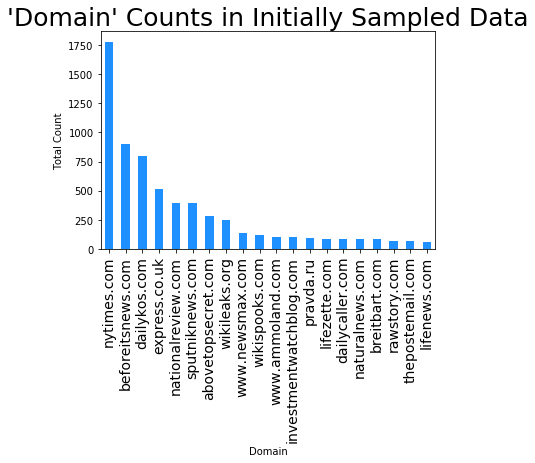

In [225]:
df.domain.value_counts().nlargest(20).plot(kind='bar', color='dodgerblue')
plt.xlabel('Domain')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=90)
plt.title("'Domain' Counts in Initially Sampled Data", fontsize=25)
plt.savefig('domaincounts.png', bbox_inches='tight')

NYT and Beforeitsnews are vastly overrepresented in the data. Let's preform undersampling.

In [226]:
nyt = df[df['domain'] == "nytimes.com"]

In [227]:
nyt_sample = nyt.sample(100)

In [228]:
mask = df['domain'].isin(['nytimes.com', 'beforeitsnews.com'])
newdf = df[~mask]

In [229]:
bef = df[df['domain'] == "beforeitsnews.com"]

In [230]:
bef_sample = bef.sample(100)

In [231]:
df_undersampling = pd.concat([newdf, nyt_sample, bef_sample], axis=0)

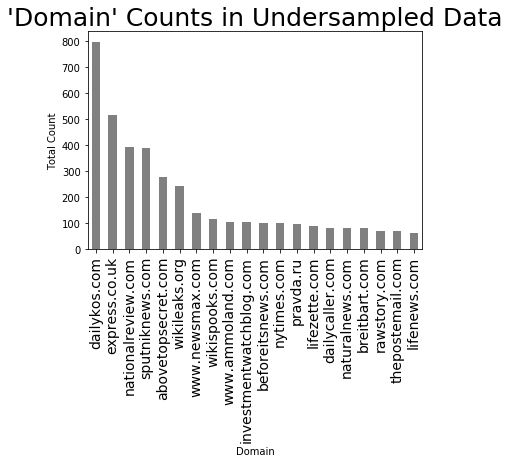

In [232]:
df_undersampling.domain.value_counts().nlargest(20).plot(kind='bar', color='grey')
plt.xlabel('Domain')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=90)
plt.title("'Domain' Counts in Undersampled Data", fontsize=25)
plt.savefig('domaincounts_under.png', bbox_inches='tight')

In [233]:
df_undersampling.shape

(7526, 16)

In [234]:
y = df_undersampling['type']

In [235]:
X_train, X_test, y_train, y_test = train_test_split(df_undersampling['content'], y, test_size=0.33, random_state=53)



In [176]:
pipeline_countvect_linsvc = Pipeline([('preproc', pre_process()),
              ('ngram', CountVectorizer(ngram_range=(1, 4), analyzer='char')),
              ('clf',   LinearSVC())])

In [177]:
pipeline_countvect_linsvc.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('preproc', pre_process()),
                ('ngram',
                 CountVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 4), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_sta

In [178]:
pipeline_countvect_linsvc.score(X_test,y_test)

0.7797513321492007

In [182]:
pipeline_countvect_multNB = Pipeline([('preproc', pre_process()),
              ('ngram', CountVectorizer()),
              ('clf',   MultinomialNB())])

In [183]:
pipeline_countvect_multNB.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preproc', pre_process()),
                ('ngram',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [184]:
pipeline_countvect_multNB.score(X_test,y_test)

0.7841918294849023

In [185]:
pipeline_tfidf_multNB = Pipeline([('preproc', pre_process()),
              ('tfidf', TfidfVectorizer()),
              ('clf',   MultinomialNB())])

In [186]:
pipeline_tfidf_multNB.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preproc', pre_process()),
                ('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [187]:
pipeline_tfidf_multNB.score(X_test,y_test)

0.6651865008880995

In [188]:
pipeline_tfidf_linsvc = Pipeline([
              ('tfidf_vect', TfidfVectorizer()),
              ('clf',   LinearSVC())])

In [189]:
pipeline_tfidf_linsvc.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
          

In [190]:
pipeline_tfidf_linsvc.score(X_test,y_test)

0.8614564831261101

In [191]:
pipeline_tfidfbigrams_linsvc = Pipeline([
              ('tfidf_vect', TfidfVectorizer(ngram_range=(2,2))),
              ('clf',   LinearSVC())])

In [192]:
pipeline_tfidfbigrams_linsvc.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(2, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
          

In [193]:
pipeline_tfidfbigrams_linsvc.score(X_test,y_test)

0.822380106571936

The most accurate model with tf-idf with linear SVC, with no additional preprocessing step.  Here is it without a pipeline to examine the most important features. 

In [199]:
tfidf_vect = TfidfVectorizer()

X_tfidf_train = tfidf_vect.fit_transform(X_train)

X_tfidf_test = tfidf_vect.transform(X_test)

In [200]:
linSVCclf = LinearSVC()

In [201]:
linSVCclf.fit(X_tfidf_train, y_train)
pred = linSVCclf.predict(X_tfidf_test)

score = metrics.accuracy_score(y_test, pred)
print(score)

0.8614564831261101


In [202]:
show_most_informative_features(tfidf_vect, linSVCclf)

	-1.9549	this           		2.8572	2016           
	-1.7208	obama          		2.2070	ap             
	-1.6048	advertisements 		2.1771	november       
	-1.2810	is             		2.0447	in             
	-1.2603	here           		2.0160	nov            
	-1.1108	gun            		1.8357	said           
	-1.0610	facebook       		1.5685	photo          
	-1.0172	brown          		1.4455	reuters        
	-0.9695	you            		1.2664	says           
	-0.9689	ever           		1.2456	at             
	-0.9638	terrorist      		1.2433	with           
	-0.9562	oregon         		1.1977	election       
	-0.9438	reddit         		1.1738	also           
	-0.9410	christmas      		1.1709	main           
	-0.9258	girl           		1.0875	tuesday        
	-0.9255	censoring      		1.0847	film           
	-0.9243	fox            		1.0610	related        
	-0.9224	believe        		1.0538	season         
	-0.9210	list           		1.0307	authorities    
	-0.9189	if             		1.0198	but            
	-0.8962	loading    

**Tf-idf with bigrams**

In [203]:
tfidf_vect_bigrams = TfidfVectorizer(ngram_range=(2,2))

In [204]:
X_tfidf__bigrams_train = tfidf_vect_bigrams.fit_transform(X_train)

In [205]:
X_tfidf__bigrams_test = tfidf_vect_bigrams.transform(X_test)

In [206]:
linSVCclf.fit(X_tfidf__bigrams_train, y_train)
pred = linSVCclf.predict(X_tfidf__bigrams_test)

In [207]:
score = metrics.accuracy_score(y_test, pred)
print(score)

0.822380106571936


In [208]:
show_most_informative_features(tfidf_vect_bigrams, nb_classifier)

	-11.6985	00 09          		-5.9844	bengals sunday 
	-11.6985	00 17          		-6.1042	already rocky  
	-11.6985	00 18          		-6.3211	at tabernacle  
	-11.6985	00 19          		-6.3276	anxiety disorder
	-11.6985	00 41          		-6.4197	all persons    
	-11.6985	00 54          		-6.6915	billion pound  
	-11.6985	00 7036        		-6.7462	aron baynes    
	-11.6985	00 am          		-6.7603	and masculinity
	-11.6985	00 and         		-6.7821	68 former      
	-11.6985	00 china       		-6.8009	be separate    
	-11.6985	00 edt         		-6.8678	big mainstream 
	-11.6985	00 est         		-6.9342	ascension during
	-11.6985	00 et          		-6.9534	appreciate your
	-11.6985	00 nov         		-6.9579	axp 72         
	-11.6985	00 pbs         		-6.9654	barely look    
	-11.6985	00 pm          		-7.0101	allows her     
	-11.6985	00 priceline   		-7.0372	any book       
	-11.6985	00 pst         		-7.0506	beach and      
	-11.6985	00 scott       		-7.0680	behavioral technique
	-11.6985	00 should     

## multi-class classification

In [209]:
df = pd.read_csv('newly_sampled_data.csv')

Text(0.5, 1.0, "'Type' Counts in Initally Sampled Data")

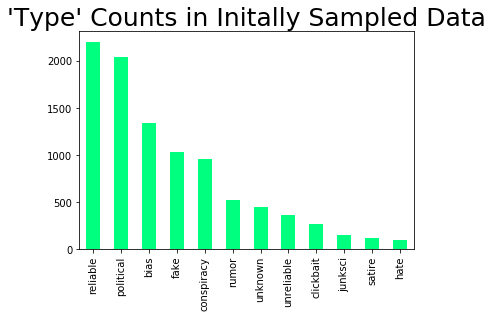

In [210]:
df.type.value_counts().plot(kind='bar',color='springgreen')
plt.title("'Type' Counts in Initally Sampled Data", fontsize=25)

Take the top four categories to make a new df. 

In [211]:
fake_new_df = df[df['type']== 'fake'].sample(n=1000, random_state=0)

bias_new_df = df[df['type']== 'bias'].sample(n=1000, random_state=0)

political_new_df = df[df['type']== 'political'].sample(n=1000, random_state=0)

reliable_new_df = df[df['type']== 'reliable'].sample(n=1000, random_state=0)

new_df = pd.concat([fake_new_df, reliable_new_df,bias_new_df,political_new_df])

Text(0.5, 1.0, "New 'Type' Counts in Sampled Data")

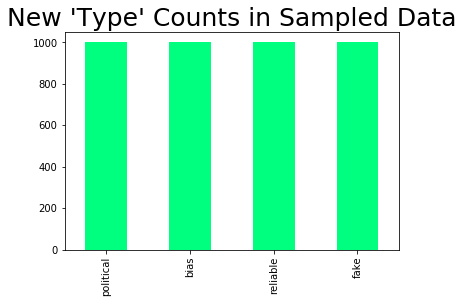

In [212]:
new_df.type.value_counts().plot(kind='bar',color='springgreen')
plt.title("New 'Type' Counts in Sampled Data", fontsize=25)

In [213]:
new_df.head()

y = new_df.type

X_train, X_test, y_train, y_test = train_test_split(new_df['content'], y, test_size=0.33, random_state=53)

count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

nb_classifier = MultinomialNB()

nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)

score = metrics.accuracy_score(y_test, pred)
print(score)

0.6757575757575758


In [214]:
labels = ['fake','political','reliable','bias']

In [215]:
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y_test, pred,  labels=labels), 
    index=['true:fake', 'true:political','true:reliable','true:bias' ], 
    columns=['pred:fake', 'pred:political', 'pred:reliable', 'pred:bias']
)
print(cmtx)

                pred:fake  pred:political  pred:reliable  pred:bias
true:fake             198              64             22          6
true:political         43             252             30         10
true:reliable          35              42            267          3
true:bias              51             107             15        175


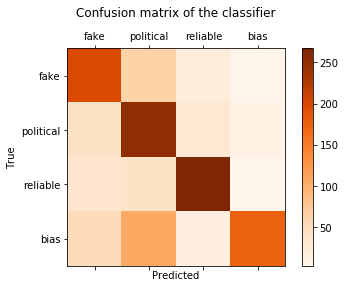

In [216]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmtx,cmap='Oranges')
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
fig.colorbar(cax)
plt.title('Confusion matrix of the classifier'+ "\n")
plt.savefig('conf_matrx.png', bbox_inches='tight')

In [217]:
tfidf_vect = TfidfVectorizer()



In [218]:
count_train = tfidf_vect.fit_transform(X_train)

count_test = tfidf_vect.transform(X_test)

In [219]:
linSVCclf = LinearSVC()

In [220]:

linSVCclf.fit(count_train, y_train)
pred = linSVCclf.predict(count_test)

score = metrics.accuracy_score(y_test, pred)
print(score)

0.7196969696969697


In [221]:
labels = ['fake','political','reliable','bias']
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y_test, pred,  labels=labels), 
    index=['true:fake', 'true:political','true:reliable','true:bias' ], 
    columns=['pred:fake', 'pred:political', 'pred:reliable', 'pred:bias']
)
print(cmtx)

                pred:fake  pred:political  pred:reliable  pred:bias
true:fake             223              27             18         22
true:political         39             217             31         48
true:reliable          16              29            282         20
true:bias              33              64             23        228


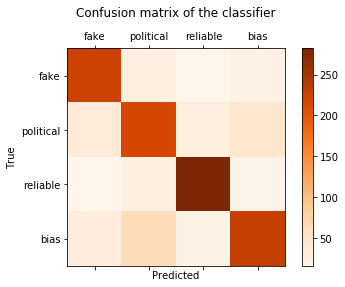

In [222]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmtx,cmap='Oranges')
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
fig.colorbar(cax)
plt.title('Confusion matrix of the classifier'+ "\n")
plt.savefig('conf_matrx.png', bbox_inches='tight')

### What happens when all of the original labels from the dataset are included in the classifier (not only 'fake','political','reliable','bias', but all of them)?

In [232]:
df = pd.read_csv('newly_sampled_data.csv')

In [233]:
df.shape

(10000, 16)

In [234]:
df = df[pd.notnull(df['content'])]

In [235]:
df = df[pd.notnull(df['type'])]

In [236]:
df.shape

(9528, 16)

Text(0.5, 1.0, "'Type' Counts in Initally Sampled Data")

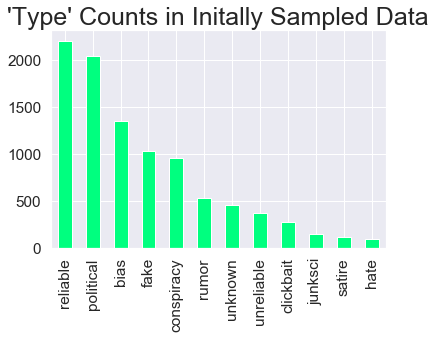

In [237]:
df.type.value_counts().plot(kind='bar',color='springgreen')
plt.title("'Type' Counts in Initally Sampled Data", fontsize=25)

In [238]:
df.type.value_counts()

reliable      2201
political     2040
bias          1342
fake          1031
conspiracy     954
rumor          523
unknown        449
unreliable     364
clickbait      268
junksci        145
satire         118
hate            93
Name: type, dtype: int64

In [239]:
y = df.type

X_train, X_test, y_train, y_test = train_test_split(df['content'], y, test_size=0.20, random_state=53)

count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

nb_classifier = MultinomialNB()

nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)

score = metrics.accuracy_score(y_test, pred)
print(score)

0.6138509968520461


In [240]:
labels = ['reliable','political','bias','fake','conspiracy','rumor','unknown','unreliable','clickbait','junksci','satire','hate']

In [241]:
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y_test, pred,  labels=labels), 
    index=['true:reliable', 'true:political','true:bias','true:fake','true:conspiracy','true:rumor','true:unknown','true:unreliable', 'true:clickbait','true:junksci','true:satire','true:hate'], 
    columns=['pred:reliable', 'pred:political', 'pred:bias', 'pred:fake','pred:conspiracy','pred:rumor','pred:unknown','pred:unreliable','pred:clickbait','pred:junksci','pred:satire','pred:hate']
)
print(cmtx)

                 pred:reliable  pred:political  pred:bias  pred:fake  \
true:reliable              388              55          8          9   
true:political              44             313         13          9   
true:bias                   17              80        143         10   
true:fake                   29              53          3        113   
true:conspiracy             13              57         13         19   
true:rumor                  44              15          2          2   
true:unknown                12              31         12          9   
true:unreliable              4              16          3          4   
true:clickbait              12              35          1          2   
true:junksci                 6               1          0         12   
true:satire                 10               5          0          3   
true:hate                    4              10          1          0   

                 pred:conspiracy  pred:rumor  pred:unknown  pre

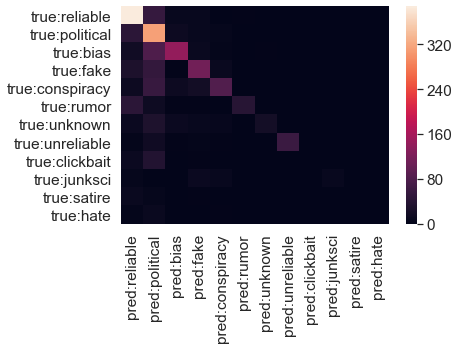

In [242]:
sns.heatmap(cmtx)
